# Lib Import


In [92]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.stats import expon


# Dice Generator

In [93]:
diceCount = 1
diceThrow = 30

throwData = []
for i in range(diceThrow):
    diceScore = [random.randint(1, 6) for _ in range(diceCount)]
    throwData.append(diceScore)

diceData = [f"Dice-{j}" for j in range(diceCount)]

diceDf = pd.DataFrame(throwData, columns=diceData)
diceDf.to_csv("DiceData.csv", index=False)
diceDf


,Dice-0
0,6
1,6
2,4
3,1
4,4
5,4
6,5
7,1
8,6
9,1


# Timestamp Generator

In [94]:
activityCount = 20

activityData = []
startTime = 0

for _ in range(activityCount):
    activity = random.randint(1, 10)
    increment = np.random.exponential(scale=5) 
    startTime += increment
    activityData.append([activity, startTime])

activityDf = pd.DataFrame(activityData, columns=["Activity Count", "Timestamp"])
activityDf.to_csv("ActivityData.csv", index=False)
activityDf


,Activity Count,Timestamp
0,6,0.265325
1,3,4.054870
2,2,7.944422
3,10,13.017110
4,5,19.491912
5,7,38.109697
6,5,41.741153
7,7,43.691252
8,1,51.619522
9,5,53.198779


(array([0.19926072, 0.11386327, 0.05693163, 0.05693163, 0.05693163,
        0.        , 0.        , 0.        , 0.02846582, 0.02846582]),
 array([ 0.12838805,  1.97732775,  3.82626745,  5.67520715,  7.52414685,
         9.37308655, 11.22202625, 13.07096594, 14.91990564, 16.76884534,
        18.61778504]),
 <BarContainer object of 10 artists>)

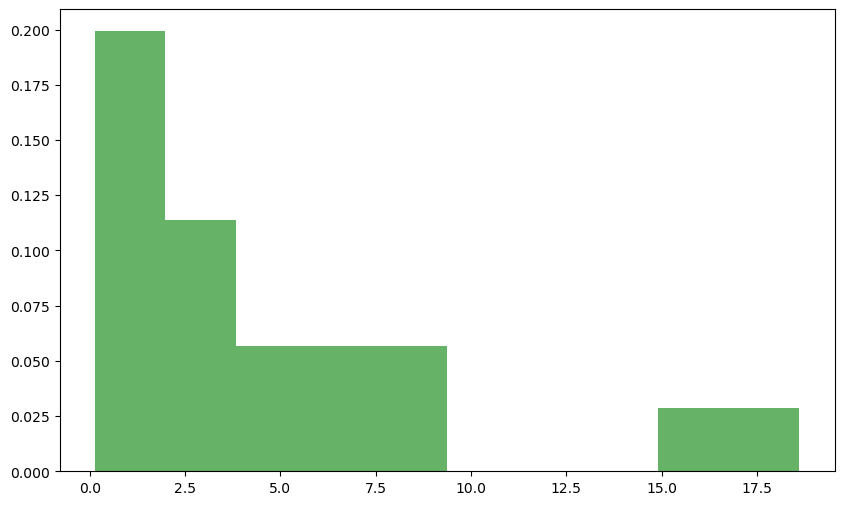

In [95]:
activityDf['Interarrival Time'] = activityDf['Timestamp'].diff().dropna()
plt.figure(figsize=(10, 6))
plt.hist(activityDf['Interarrival Time'], bins=10, density=True, alpha=0.6, color='g', label='Data')

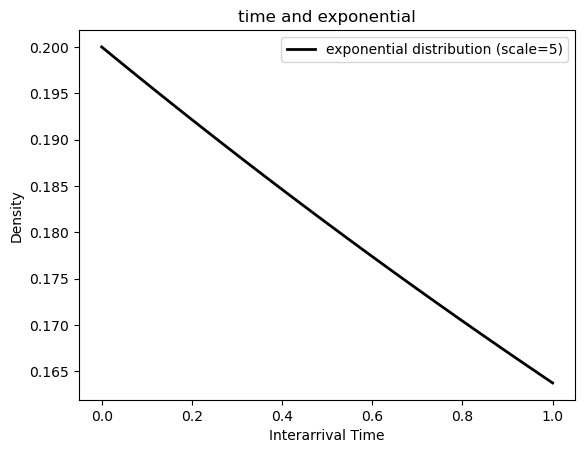

In [96]:
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = expon.pdf(x, scale=5)  
plt.plot(x, p, 'k', linewidth=2, label='exponential distribution (scale=5)')
plt.title('time and exponential')
plt.xlabel('Interarrival Time')
plt.ylabel('Density')
plt.legend()
plt.show()

In [98]:
ks_statistic, ks_p_value = kstest(activityDf['Interarrival Time'].dropna(), 'expon', args=(0, 5))
print(f"K-S Statistic: {ks_statistic}")
print(f"P-Value: {ks_p_value}")

if ks_p_value > 0.05:
    print("acc")
else:
    print("reject")

K-S Statistic: 0.0909438257583145
P-Value: 0.9932551582350453
acc
